In [1]:
import torch
import profiler
from matplotlib import pyplot as plt
from tqdm import tqdm

profiler.init()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Number of blocks: 1750
Model creation time: 4.25 seconds
[ModelProfiler] Initializing base KV entries


0it [00:00, ?it/s]

Elapsed time: 66.349 ms
Elapsed time: 86.917 ms
Elapsed time: 105.190 ms


1it [00:02,  2.55s/it]

Elapsed time: 122.859 ms
Elapsed time: 64.727 ms
Elapsed time: 82.217 ms
Elapsed time: 98.935 ms


2it [00:04,  2.42s/it]

Elapsed time: 116.695 ms
Elapsed time: 62.802 ms
Elapsed time: 82.393 ms
Elapsed time: 102.869 ms


3it [00:07,  2.41s/it]

Elapsed time: 122.305 ms
Elapsed time: 63.286 ms
Elapsed time: 82.454 ms
Elapsed time: 101.803 ms


4it [00:09,  2.39s/it]

Elapsed time: 120.820 ms
Elapsed time: 62.456 ms
Elapsed time: 83.076 ms
Elapsed time: 102.759 ms


5it [00:12,  2.39s/it]

Elapsed time: 121.906 ms
Elapsed time: 63.720 ms
Elapsed time: 83.500 ms
Elapsed time: 103.518 ms


6it [00:14,  2.40s/it]

Elapsed time: 119.465 ms
Elapsed time: 64.389 ms
Elapsed time: 84.203 ms
Elapsed time: 103.894 ms


7it [00:16,  2.41s/it]

Elapsed time: 120.488 ms
Elapsed time: 63.765 ms
Elapsed time: 84.579 ms
Elapsed time: 104.787 ms


8it [00:19,  2.42s/it]

Elapsed time: 119.788 ms
Elapsed time: 67.803 ms
Elapsed time: 88.318 ms
Elapsed time: 109.589 ms


9it [00:21,  2.46s/it]

Elapsed time: 125.105 ms
Elapsed time: 68.414 ms
Elapsed time: 87.593 ms
Elapsed time: 107.110 ms


10it [00:24,  2.49s/it]

Elapsed time: 124.484 ms
Elapsed time: 71.784 ms
Elapsed time: 97.145 ms
Elapsed time: 118.724 ms


11it [00:27,  2.55s/it]

Elapsed time: 126.140 ms
Elapsed time: 72.505 ms
Elapsed time: 90.024 ms
Elapsed time: 109.240 ms


12it [00:29,  2.56s/it]

Elapsed time: 127.121 ms
Elapsed time: 71.200 ms
Elapsed time: 91.831 ms
Elapsed time: 111.212 ms


13it [00:32,  2.59s/it]

Elapsed time: 129.541 ms
Elapsed time: 72.496 ms
Elapsed time: 91.772 ms
Elapsed time: 111.080 ms


14it [00:35,  2.62s/it]

Elapsed time: 132.938 ms
Elapsed time: 73.380 ms
Elapsed time: 94.046 ms
Elapsed time: 112.385 ms


15it [00:37,  2.64s/it]

Elapsed time: 128.816 ms
Elapsed time: 72.281 ms
Elapsed time: 95.995 ms
Elapsed time: 111.207 ms


16it [00:40,  2.53s/it]

Elapsed time: 127.772 ms


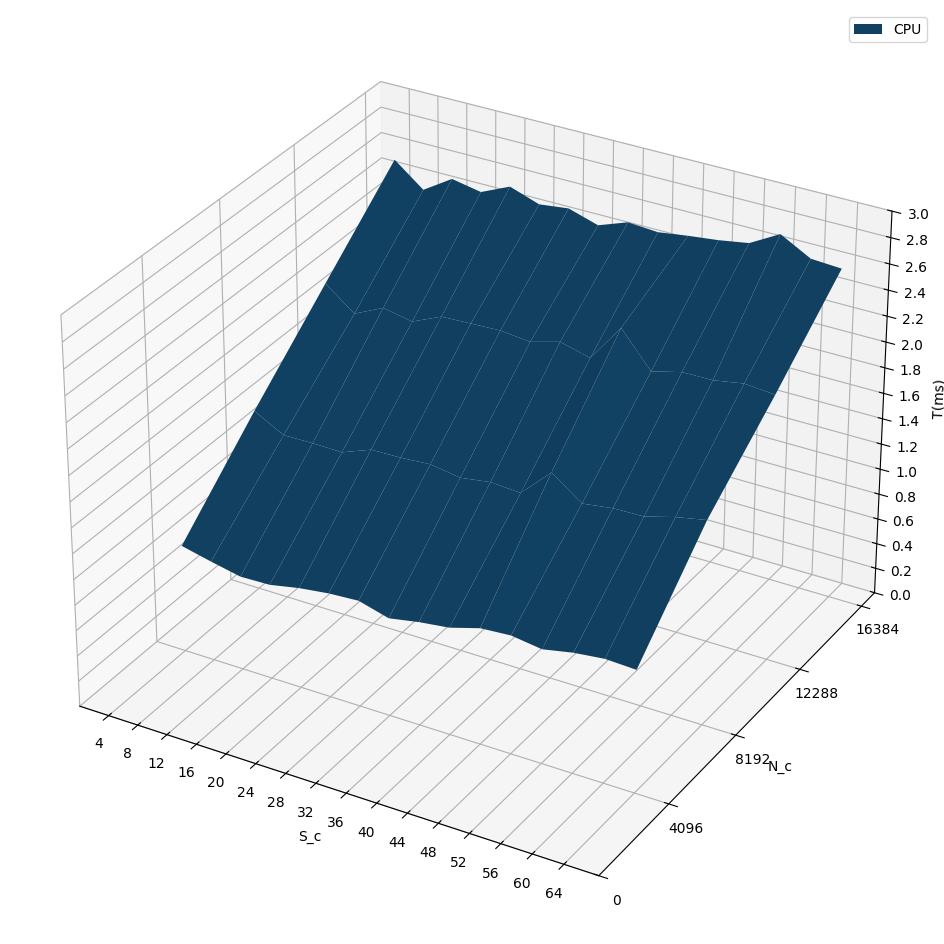

In [2]:
import numpy as np

def get_decode_attn_perf_model():
  LS = 17
  LN = 5
  S_list = [i * 4 for i in range(1, LS)]
  N_list = [4096 * i for i in range(1, LN)]

  T_array = np.zeros((len(S_list), len(N_list)), dtype=np.float32)
  for i, S in tqdm(enumerate(S_list)):
    for j, N in enumerate(N_list):
      # Create an list with N entries and the sum of the list is W
      cpu_decode_lens = [N // S] * (S - N % S) + [N // S + 1] * (N % S)
      # print(cpu_decode_lens)
      res = profiler.profiler._run_test_case(
        cpu_decode_lens=cpu_decode_lens
      )
      T_array[i, j] = res.avg_cpu_attn_time

  ax = plt.axes(projection='3d')
  ax.plot_surface(
    np.outer(S_list, np.ones(len(N_list))),
    np.outer(np.ones(len(S_list)), N_list),
    T_array,
    label = "CPU"
  )

  ax.set_xlim(0)
  ax.set_ylim(0)
  ax.set_xticks(S_list)
  ax.set_yticks([0] + N_list)
  ax.set_zticks([0.2 * i for i in range(0, 16)])
  ax.set_xlabel("S_c")
  ax.set_ylabel("N_c")
  ax.set_zlabel("T(ms)")


plt.figure(figsize=(16, 12))
get_decode_attn_perf_model()

plt.grid()
plt.legend()

  0%|          | 0/32 [00:00<?, ?it/s]

  3%|▎         | 1/32 [00:00<00:07,  3.99it/s]

Time taken: 37.28 ms


  6%|▋         | 2/32 [00:00<00:06,  4.50it/s]

Time taken: 39.12 ms


  9%|▉         | 3/32 [00:00<00:06,  4.67it/s]

Time taken: 40.65 ms


 12%|█▎        | 4/32 [00:00<00:05,  4.73it/s]

Time taken: 41.17 ms


 16%|█▌        | 5/32 [00:01<00:06,  4.15it/s]

Time taken: 54.45 ms


 19%|█▉        | 6/32 [00:01<00:06,  3.75it/s]

Time taken: 63.02 ms


 22%|██▏       | 7/32 [00:01<00:07,  3.35it/s]

Time taken: 72.77 ms


 25%|██▌       | 8/32 [00:02<00:07,  3.12it/s]

Time taken: 73.31 ms


 28%|██▊       | 9/32 [00:02<00:08,  2.62it/s]

Time taken: 102.92 ms


 31%|███▏      | 10/32 [00:03<00:09,  2.35it/s]

Time taken: 104.91 ms


 34%|███▍      | 11/32 [00:03<00:09,  2.18it/s]

Time taken: 105.95 ms


 38%|███▊      | 12/32 [00:04<00:09,  2.08it/s]

Time taken: 106.63 ms


 41%|████      | 13/32 [00:04<00:10,  1.87it/s]

Time taken: 131.95 ms


 44%|████▍     | 14/32 [00:05<00:10,  1.74it/s]

Time taken: 132.60 ms


 47%|████▋     | 15/32 [00:06<00:10,  1.66it/s]

Time taken: 133.51 ms


 50%|█████     | 16/32 [00:06<00:09,  1.60it/s]

Time taken: 134.63 ms


 53%|█████▎    | 17/32 [00:07<00:09,  1.50it/s]

Time taken: 151.51 ms


 56%|█████▋    | 18/32 [00:08<00:09,  1.44it/s]

Time taken: 152.31 ms


 59%|█████▉    | 19/32 [00:09<00:09,  1.39it/s]

Time taken: 155.03 ms


 62%|██████▎   | 20/32 [00:10<00:09,  1.31it/s]

Time taken: 173.53 ms


 66%|██████▌   | 21/32 [00:11<00:08,  1.23it/s]

Time taken: 186.02 ms


 69%|██████▉   | 22/32 [00:12<00:08,  1.18it/s]

Time taken: 186.97 ms


 72%|███████▏  | 23/32 [00:12<00:07,  1.14it/s]

Time taken: 188.12 ms


 75%|███████▌  | 24/32 [00:13<00:07,  1.11it/s]

Time taken: 188.63 ms


 78%|███████▊  | 25/32 [00:14<00:06,  1.08it/s]

Time taken: 196.35 ms


 81%|████████▏ | 26/32 [00:15<00:05,  1.03it/s]

Time taken: 215.74 ms


 84%|████████▍ | 27/32 [00:17<00:05,  1.00s/it]

Time taken: 216.48 ms


 88%|████████▊ | 28/32 [00:18<00:04,  1.03s/it]

Time taken: 219.87 ms


 91%|█████████ | 29/32 [00:19<00:03,  1.06s/it]

Time taken: 227.40 ms


 94%|█████████▍| 30/32 [00:20<00:02,  1.09s/it]

Time taken: 228.18 ms


 97%|█████████▋| 31/32 [00:21<00:01,  1.15s/it]

Time taken: 260.67 ms


100%|██████████| 32/32 [00:23<00:00,  1.39it/s]

Time taken: 261.43 ms


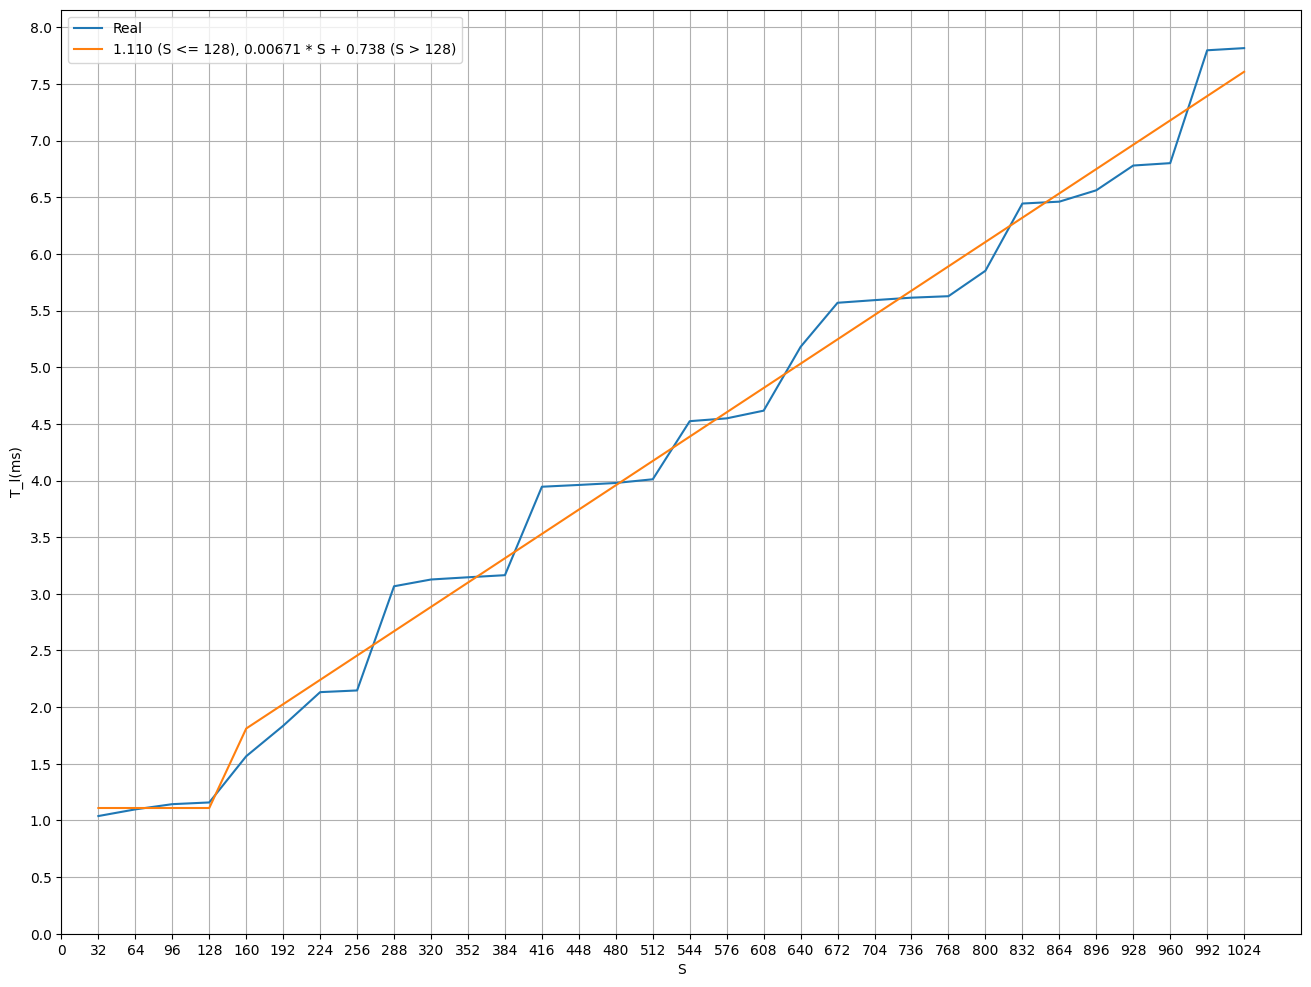

In [3]:
def regression(
  ys: list[float],
  xs: list[float]
) -> float:
  """
  y = kx

  Find the best k that minimizes the loss.
  """
  x = torch.tensor(xs)[:, None]
  y = torch.tensor(ys)[:, None]

  A = x
  sol = torch.linalg.lstsq(A, y).solution
  k = sol[0, 0].item()

  return k

def regression_biased(
  ys: list[float],
  xs: list[float]
) -> tuple[float, float]:
  """
  y = kx + b

  Find the best k and b that minimizes the loss.
  """
  x = torch.tensor(xs)[:, None]
  y = torch.tensor(ys)[:, None]

  A = torch.cat([x, torch.ones_like(x, dtype=torch.float32)], dim=1)
  sol = torch.linalg.lstsq(A, y).solution
  k = sol[0, 0].item()
  b = sol[1, 0].item()

  return k, b

def get_linear_perf_model() -> tuple[float, float, float, float]:
  """
  T_l = 
    c_l,           if S < 128
    k_l * S + b_l, if S >= 128

  Return estimated k_l, b_l
  """
  S_list = [32 * i for i in range(1, 33)]
  Tl_list = []

  for S in tqdm(S_list):
    res = profiler.run_test_case(
      prefill_lens=[S]
    )
    Tl_list.append(res.avg_gpu_linr_time)

  plt.plot(S_list, Tl_list, label="Real")
  
  cl = sum(Tl_list[:4]) / 4
  kl, bl = regression_biased(Tl_list[4:], S_list[4:])

  plt.plot(S_list, [cl] * 4 + [kl * S + bl for S in S_list[4:]], label=f"{cl:.3f} (S <= 128), {kl:.5f} * S + {bl:.3f} (S > 128)")

  plt.xlim(0)
  plt.ylim(0)
  plt.xticks([0] + S_list)
  plt.yticks([0.5 * i for i in range(0, 17)])
  plt.xlabel("S")
  plt.ylabel("T_l(ms)")

  return kl, bl

plt.figure(figsize=(16, 12))
kl, bl = get_linear_perf_model()
plt.grid()
plt.legend()

100%|██████████| 15/15 [01:23<00:00,  5.58s/it]


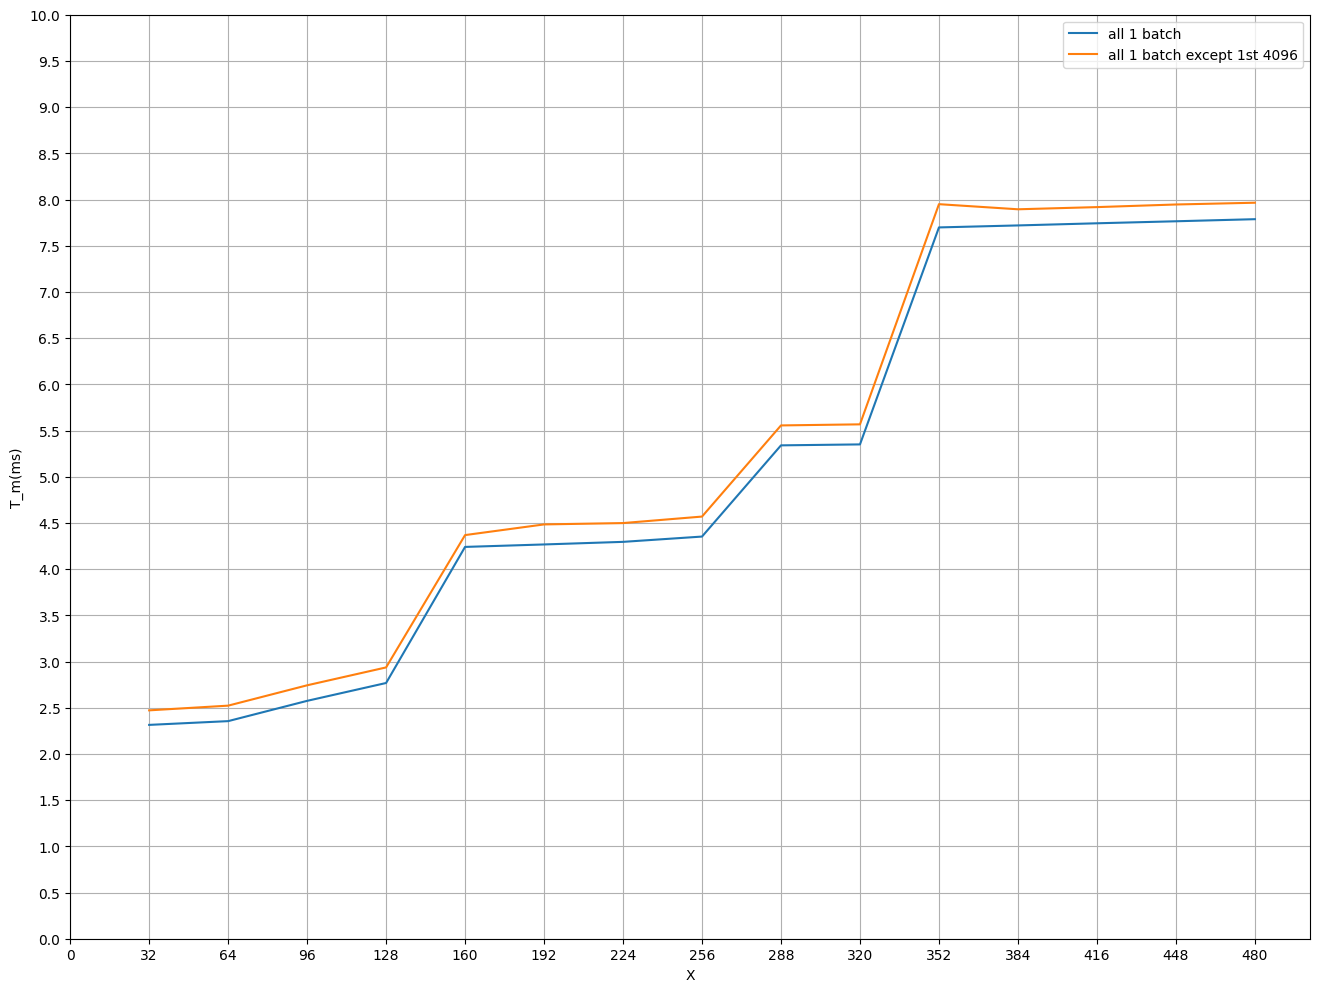

In [3]:
def get_margin_layer_perf_model():
  S_list = [32 * i for i in range(1, 16)]

  Tm_list = []
  for S in tqdm(S_list):
    res = profiler.run_test_case(
      prefill_lens=[1] * S,
    )
    Tm_list.append(res.margin_layer_time)
  plt.plot(S_list, Tm_list, label="all 1 batch")

  Tm_list = []
  for S in tqdm(S_list):
    res = profiler.run_test_case(
      prefill_lens=[4096] + [1] * (S - 1),
    )
    Tm_list.append(res.margin_layer_time)
  plt.plot(S_list, Tm_list, label="all 1 batch except 1st 4096")

  plt.xlim(0)
  plt.ylim(0)
  plt.xticks([0] + S_list)
  plt.yticks([0.5 * i for i in range(0, 21)])
  plt.xlabel("X")
  plt.ylabel("T_m(ms)")

plt.figure(figsize=(16, 12))
get_margin_layer_perf_model()
plt.grid()
plt.legend()

Elapsed time: 37.856 ms
Elapsed time: 39.038 ms
Elapsed time: 39.220 ms
Elapsed time: 39.916 ms
Elapsed time: 40.540 ms
Elapsed time: 41.298 ms
Elapsed time: 42.017 ms
Elapsed time: 42.630 ms


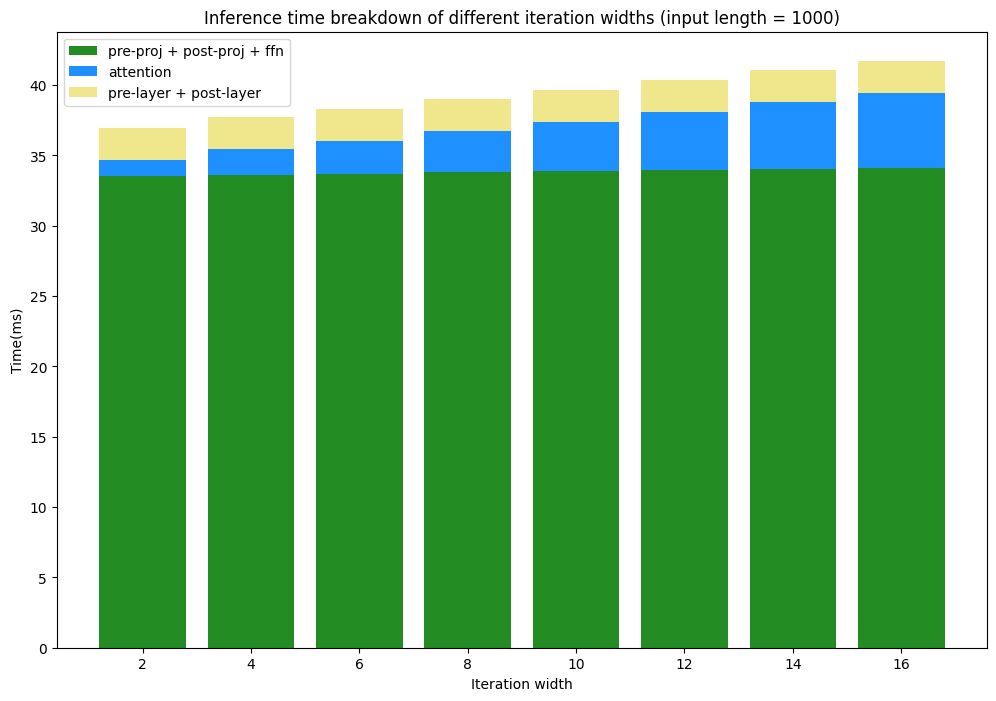

In [25]:
import numpy as np

def iw_time_relationship():
  """
  Test the relationship between the number of tokens and the inference time.
  """
  in_len = 1000
  xs = [2, 4, 6, 8, 10, 12, 14, 16]
  ress = []
  for x in xs:
    ress.append(profiler.profiler._run_test_case(
      gpu_decode_lens=[in_len] * x,
    ))

  num_layers = profiler.model.model_config.num_layers

  linr_times = np.array([res.avg_gpu_linr_time for res in ress]) * num_layers
  attn_times = np.array([res.avg_gpu_attn_time for res in ress]) * num_layers
  margin_times = np.array([res.margin_layer_time for res in ress])

  bottom = np.zeros_like(linr_times)

  # draw stacked bar chart
  xts = range(len(xs))
  plt.xticks(xts, xs)
  plt.bar(xts, linr_times, label="pre-proj + post-proj + ffn", bottom=bottom, color="forestgreen")
  bottom += linr_times
  plt.bar(xts, attn_times, label="attention", bottom=bottom, color="dodgerblue")
  bottom += attn_times
  plt.bar(xts, margin_times, label="pre-layer + post-layer", bottom=bottom, color="khaki")
  plt.xlabel("Iteration width")
  plt.ylabel("Time(ms)")
  plt.title("Inference time breakdown of different iteration widths (input length = 1000)")

plt.figure(figsize=(12, 8))
iw_time_relationship()
# plt.grid()
plt.legend()

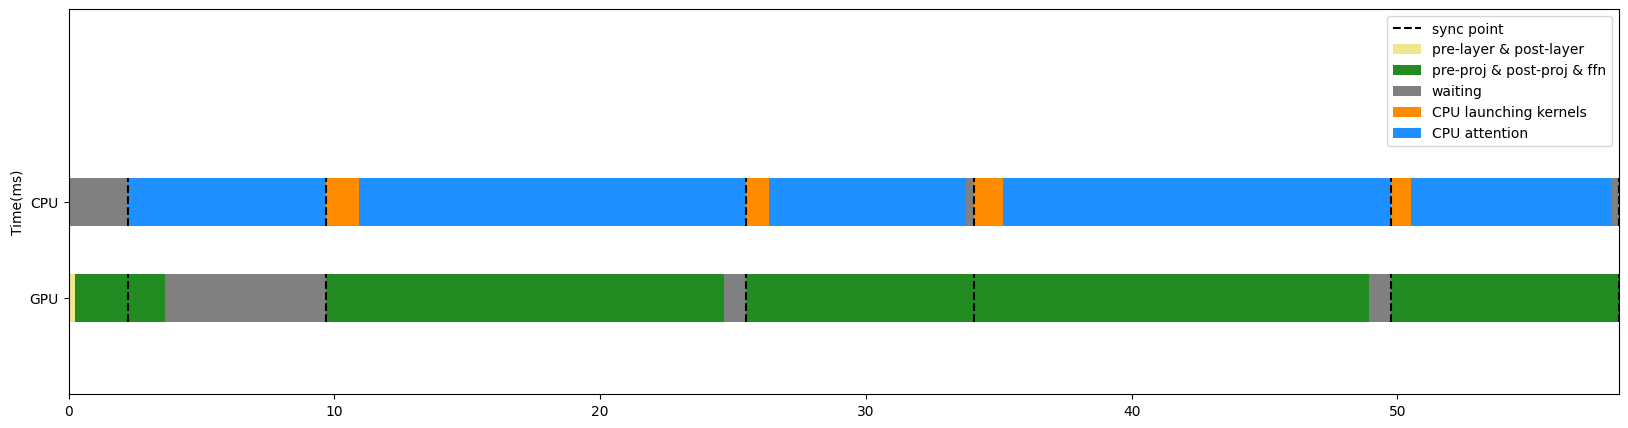